In [1]:
#import everything
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#load the data
mydata = pd.read_csv("cleanWithHeader.csv")

In [3]:
mydata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,application_type_index,acc_now_delinq_index,grade_index,purpose_index,home_ownership_index,emp_length_index,verification_status_index,sub_grade_index,term_index,initial_list_status_index
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000,27.65,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000,1.00,0,...,0.0,0.0,1.0,6.0,1.0,2.0,0.0,7.0,1.0,0.0
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252,8.72,0,...,0.0,0.0,1.0,5.0,1.0,0.0,2.0,10.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200,20.00,0,...,0.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000,17.94,0,...,0.0,0.0,0.0,3.0,1.0,4.0,0.0,6.0,1.0,0.0


In [4]:
 #Re-arrange the dataset
data_reordered = mydata[["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc",
                             "dti","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","total_acc","out_prncp","out_prncp_inv",
                             "total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries",
                             "collection_recovery_fee","revol_util_imputed","last_pymnt_amnt_imputed","collections_12_mths_ex_med_imputed",
                             "policy_code_imputed","tot_coll_amt_imputed","tot_cur_bal_imputed","total_rev_hi_lim_imputed","pymnt_plan_index",
                             "application_type_index","acc_now_delinq_index","grade_index","purpose_index","home_ownership_index",
                             "emp_length_index","verification_status_index","sub_grade_index","term_index","initial_list_status_index", "default_ind"]]

In [5]:
data_reordered.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,acc_now_delinq_index,grade_index,purpose_index,home_ownership_index,emp_length_index,verification_status_index,sub_grade_index,term_index,initial_list_status_index,default_ind
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000,27.65,0,...,0.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000,1.00,0,...,0.0,1.0,6.0,1.0,2.0,0.0,7.0,1.0,0.0,1
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252,8.72,0,...,0.0,1.0,5.0,1.0,0.0,2.0,10.0,0.0,0.0,0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200,20.00,0,...,0.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000,17.94,0,...,0.0,0.0,3.0,1.0,4.0,0.0,6.0,1.0,0.0,0


In [6]:
# get the features 
X = data_reordered.iloc[:,0:42]

In [7]:
X

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,application_type_index,acc_now_delinq_index,grade_index,purpose_index,home_ownership_index,emp_length_index,verification_status_index,sub_grade_index,term_index,initial_list_status_index
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000,27.65,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000,1.00,0,...,0.0,0.0,1.0,6.0,1.0,2.0,0.0,7.0,1.0,0.0
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252,8.72,0,...,0.0,0.0,1.0,5.0,1.0,0.0,2.0,10.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200,20.00,0,...,0.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000,17.94,0,...,0.0,0.0,0.0,3.0,1.0,4.0,0.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855738,36371250,39102635,10000,10000,10000.0,11.99,332.10,31000,28.69,0,...,0.0,0.0,0.0,0.0,1.0,9.0,1.0,6.0,0.0,0.0
855739,36441262,39152692,24000,24000,24000.0,11.99,797.03,79000,3.90,0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,6.0,0.0,0.0
855740,36271333,38982739,13000,13000,13000.0,15.99,316.07,35000,30.90,0,...,0.0,0.0,3.0,0.0,1.0,5.0,1.0,13.0,1.0,1.0
855741,36490806,39222577,12000,12000,12000.0,19.99,317.86,64400,27.19,1,...,0.0,0.0,4.0,0.0,1.0,4.0,0.0,22.0,1.0,1.0


In [8]:
#get only the last coloumn which is default_ind, the coloumn which we want to predict 
Y = data_reordered.iloc[:,-1]

In [9]:
Y

0         0
1         1
2         0
3         0
4         0
         ..
855738    0
855739    0
855740    0
855741    0
855742    0
Name: default_ind, Length: 855743, dtype: int64

In [10]:
#(1) Randomly separate the data into two subsets: ~70% for training and ~30% for test
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [11]:
#Create the validation data 
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state = 25)

In [12]:
#check the train and test dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(547675, 42)
(171149, 42)
(547675,)
(171149,)


In [13]:
#check the validation dataset
print(x_validation.shape)
print(y_validation.shape)

(136919, 42)
(136919,)


In [15]:
#Create a Feedforward Neural Network
model = keras.models.Sequential()
 
model.add(keras.layers.InputLayer(input_shape=[42,]))
model.add(keras.layers.Dense(50, activation="tanh", kernel_regularizer=keras.regularizers.L1L2(l1=0.001, l2 = 0.001)))
model.add(keras.layers.Dense(50, activation="tanh"))
# model.add(keras.layers.Dense(40, activation="tanh"))
# model.add(keras.layers.Dense(40, activation="tanh"))
#this is the output layer
#softmax is used because it can calculate the distribution of probabilities
model.add(keras.layers.Dense(2, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2150      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 4,802
Trainable params: 4,802
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers


In [18]:
#compile the model 
sgd = keras.optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
#use the gradient descent as the optimizer (change the weight and learning rate to reduce loss)
#set the learning rates
 optimizer= sgd,
#metrics to calculate the performance of the model during training and validation
 metrics=["accuracy"])

/Users/christynatalia/opt/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
X.isnull().values.any()

False

In [22]:
#try to fit the training model into the model. 
n_epochs = 1500
history_validation = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=n_epochs)

Epoch 1/10
17115/17115 [==============================] - 19s 1ms/step - loss: 0.2126 - accuracy: 0.9456 - val_loss: 0.2215 - val_accuracy: 0.9460
Epoch 2/10
17115/17115 [==============================] - 19s 1ms/step - loss: 0.2125 - accuracy: 0.9456 - val_loss: 0.2112 - val_accuracy: 0.9460
Epoch 3/10
17115/17115 [==============================] - 18s 1ms/step - loss: 0.2125 - accuracy: 0.9456 - val_loss: 0.2106 - val_accuracy: 0.9460
Epoch 4/10
17115/17115 [==============================] - 18s 1ms/step - loss: 0.2124 - accuracy: 0.9456 - val_loss: 0.2107 - val_accuracy: 0.9460
Epoch 5/10
17115/17115 [==============================] - 18s 1ms/step - loss: 0.2124 - accuracy: 0.9456 - val_loss: 0.2107 - val_accuracy: 0.9460
Epoch 6/10
17115/17115 [==============================] - 18s 1ms/step - loss: 0.2122 - accuracy: 0.9456 - val_loss: 0.2109 - val_accuracy: 0.9460
Epoch 7/10
17115/17115 [==============================] - 18s 1ms/step - loss: 0.2121 - accuracy: 0.9456 - val_loss: 0

(0, 1)

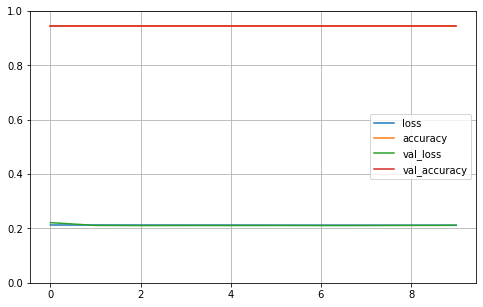

In [23]:
pd.DataFrame(history_validation.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [65]:
model.evaluate(x_test, y_test)

5349/5349 [==============================] - 4s 733us/step - loss: 0.2095 - accuracy: 0.9461


[0.2094537317752838, 0.946093738079071]